<a href="https://colab.research.google.com/github/hashemadl1/SAQ-wines/blob/master/wine_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Introduction:** 
This notebook is the second phase of the SAQ project in which the data extracted from SAQ website will be analysed and some insights will be get. There are two CSV files, one is for wine data, the other for spirit data, they are the result of the first phase of the SAQ project.

If you are using Google Colab and Drive, you can put the CSV files inside of your drive, if not, simply provide the full path.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!cp "/content/drive/MyDrive/saq project/our_wine_dataset.csv" "/content" 
!cp "/content/drive/MyDrive/saq project/countries.csv" "/content"
!cp "/content/drive/MyDrive/saq project/our_spirit_dataset-1.csv" "/content"

In this part, the spark libraries are imported and installed.

In [5]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [6]:
!wget -q https://www-us.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz

In [7]:
!tar xf spark-3.0.1-bin-hadoop2.7.tgz

In [8]:
!pip install -q findspark

In [9]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"

In [10]:
import findspark
findspark.init()

In [11]:
findspark.find()

'/content/spark-3.0.1-bin-hadoop2.7'

In [12]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [13]:
spark

In [14]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2021-01-08 23:40:10--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.229.59.32, 52.200.171.63, 34.234.81.220, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.229.59.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.2’

ngrok-stable-linux- 100%[===================>]  13.13M  39.7MB/s    in 0.3s    

2021-01-08 23:40:10 (39.7 MB/s) - ‘ngrok-stable-linux-amd64.zip.2’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   
{"tunnels":[],"uri":"/api/tunnels"}


Check the path and CSV files before reading.<br>
In this notebook, df is the wine data set, df_spt is the spirit data set.

In [15]:
!pwd

/content


In [16]:
df = spark.read.csv("our_wine_dataset.csv", header=True, inferSchema=True)

In [17]:
df = df.drop('_c0')

In [18]:
df.show()

+-------------+--------------------+---------------------+--------------------+-----------------+-------------+-----+------+--------------------+--------------------+--------+-------------+------------------+----------+--------------------+---------------+------------+--------------+-----------+---------------+--------------+--------------------+---------------------+----------------+---------------+
|      Country|              Region|Regulated Designation|       Grape variety|Degree of alcohol|Sugar content|Color|  Size|            Producer|     Promoting agent|SAQ code|     UPC code|Product of Québec|productSku|         productName|productCategory|productPrice|productInStock|productType|productAvgScore|productReviews|          image_link|Designation of origin|  Classification|Special feature|
+-------------+--------------------+---------------------+--------------------+-----------------+-------------+-----+------+--------------------+--------------------+--------+-------------+---

In [19]:
df_spt = spark.read.csv("our_spirit_dataset-1.csv", header=True, inferSchema=True)

I check the schema of the wine data set.

In [20]:
df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Regulated Designation: string (nullable = true)
 |-- Grape variety: string (nullable = true)
 |-- Degree of alcohol: string (nullable = true)
 |-- Sugar content: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Producer: string (nullable = true)
 |-- Promoting agent: string (nullable = true)
 |-- SAQ code: integer (nullable = true)
 |-- UPC code: long (nullable = true)
 |-- Product of Québec: string (nullable = true)
 |-- productSku: integer (nullable = true)
 |-- productName: string (nullable = true)
 |-- productCategory: string (nullable = true)
 |-- productPrice: double (nullable = true)
 |-- productInStock: boolean (nullable = true)
 |-- productType: string (nullable = true)
 |-- productAvgScore: double (nullable = true)
 |-- productReviews: integer (nullable = true)
 |-- image_link: string (nullable = true)
 |-- Designation of origin: string

The data type of two columns (productSku, SAQ_code) are changed to string.

In [21]:
df = df.withColumn("productSku_tmp", df.productSku.cast("string")).drop("productSku").withColumnRenamed("productSku_tmp", "productSku")
df = df.withColumn("SAQ_code", df['SAQ code'].cast("string"))


In [22]:
df.show(10)

+-------------+--------------------+---------------------+--------------------+-----------------+-------------+-----+------+--------------------+--------------------+--------+-------------+------------------+--------------------+---------------+------------+--------------+-----------+---------------+--------------+--------------------+---------------------+----------------+---------------+----------+--------+
|      Country|              Region|Regulated Designation|       Grape variety|Degree of alcohol|Sugar content|Color|  Size|            Producer|     Promoting agent|SAQ code|     UPC code|Product of Québec|         productName|productCategory|productPrice|productInStock|productType|productAvgScore|productReviews|          image_link|Designation of origin|  Classification|Special feature|productSku|SAQ_code|
+-------------+--------------------+---------------------+--------------------+-----------------+-------------+-----+------+--------------------+--------------------+--------

In [23]:
df.describe().show()

+-------+-------+---------+---------------------+--------------------+-----------------+-------------+-----+------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+-----------------+-----------+------------------+-------------------+--------------------+---------------------+--------------+--------------------+--------------------+--------------------+
|summary|Country|   Region|Regulated Designation|       Grape variety|Degree of alcohol|Sugar content|Color|  Size|            Producer|     Promoting agent|            SAQ code|            UPC code|Product of Québec|         productName|     productCategory|     productPrice|productType|   productAvgScore|     productReviews|          image_link|Designation of origin|Classification|     Special feature|          productSku|            SAQ_code|
+-------+-------+---------+---------------------+--------------------+-----------------+----------

The wine data set has 10254 rows.



In [24]:
df.count()

10254

In [25]:
df_spt.describe().show()

+-------+--------------------+-------+-----------------+------+------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+------------------+-----------+------------------+--------------------+------------------+----------------+---------------+---------------------+---------------------+--------------------+-------------+
|summary|             Country| Region|Degree of alcohol| Color|  Size|            Producer|     Promoting agent|            SAQ code|            UPC code|Product of Québec|          productSku|         productName|     productCategory|      productPrice|productType|   productAvgScore|          image_link|    productReviews|  Classification|Special feature|Designation of origin|Regulated Designation|       Grape variety|Sugar content|
+-------+--------------------+-------+-----------------+------+------+--------------------+--------------------+----------

The spirit data set has 2116 rows.

In [26]:
df_spt.count()

2116

We look at the wine alcohol percentage.



In [27]:
df.select("Degree of alcohol").distinct().show()


+-----------------+
|Degree of alcohol|
+-----------------+
|             14 %|
|           11.1 %|
|          11.78 %|
|          14.71 %|
|             11 %|
|          13.87 %|
|           16.5 %|
|              0 %|
|           13.4 %|
|           13.2 %|
|          11.21 %|
|           14.8 %|
|           11.4 %|
|           14.5 %|
|           13.6 %|
|              7 %|
|           12.5 %|
|          12.71 %|
|           10.3 %|
|           0.05 %|
+-----------------+
only showing top 20 rows



We look at the spirit alcohol percentage.

In [28]:
df_spt.select("Degree of alcohol").distinct().show()

+-----------------+
|Degree of alcohol|
+-----------------+
|           55.8 %|
|           50.8 %|
|           58.4 %|
|           16.5 %|
|           43.5 %|
|           51.9 %|
|             19 %|
|           46.8 %|
|           53.3 %|
|             38 %|
|           48.8 %|
|           52.9 %|
|           56.8 %|
|           19.5 %|
|           56.4 %|
|           56.6 %|
|           42.9 %|
|           47.2 %|
|           44.7 %|
|           37.5 %|
+-----------------+
only showing top 20 rows



There are 36 countries amoung the countries produce wine products.

In [29]:
df.select('Country').distinct().count()

36

There are 67 countries amoung the countries produce spirit products.

In [30]:
df_spt.select('Country').distinct().count()

67

France and Italy are two top countries produce and export wine to Canada.

In [31]:
df.groupBy("Country").count().orderBy("count", ascending=False).show(truncate=False)

+-------------+-----+
|Country      |count|
+-------------+-----+
|France       |4502 |
|Italy        |2001 |
|United States|890  |
|Spain        |760  |
|Canada       |355  |
|Portugal     |316  |
|Australia    |239  |
|Chile        |226  |
|Argentina    |202  |
|South Africa |195  |
|Germany      |132  |
|Greece       |98   |
|New Zealand  |95   |
|Austria      |78   |
|Lebanon      |35   |
|Israel       |29   |
|null         |20   |
|Hungary      |15   |
|Switzerland  |12   |
|Uruguay      |7    |
+-------------+-----+
only showing top 20 rows



Canada, United Kingdom and France are three top countries produce spirit products for Quebec market.

In [32]:
df_spt.groupBy("Country").count().orderBy("count", ascending=False).show(truncate=False)

+------------------+-----+
|Country           |count|
+------------------+-----+
|Canada            |468  |
|United Kingdom    |436  |
|France            |332  |
|United States     |183  |
|Italy             |130  |
|Mexico            |123  |
|Ireland           |58   |
|Japan             |29   |
|Spain             |27   |
|Netherlands       |21   |
|Sweden            |21   |
|Jamaica           |17   |
|Poland            |16   |
|Guyana            |14   |
|Dominican Republic|13   |
|Brazil            |12   |
|Panama            |12   |
|Barbados          |11   |
|South Africa      |11   |
|Lebanon           |10   |
+------------------+-----+
only showing top 20 rows



Red wind is the most popular for wine in Quebec.

In [33]:
df.groupBy("Color").count().orderBy("count", ascending=False).show(truncate=False)

+-----+-----+
|Color|count|
+-----+-----+
|Red  |6755 |
|White|3200 |
|Pink |279  |
|null |20   |
+-----+-----+



Amber is the most popular color for spirits in Quebec.

In [34]:
df_spt.groupBy("Color").count().orderBy("count", ascending=False).show(truncate=False)

+------+-----+
|Color |count|
+------+-----+
|Amber |895  |
|null  |553  |
|Golden|189  |
|Brown |131  |
|White |129  |
|Yellow|38   |
|Beige |31   |
|Pink  |30   |
|Red   |29   |
|Green |28   |
|Violet|15   |
|Blue  |13   |
|Orange|10   |
|Blond |9    |
|Black |8    |
|Russet|8    |
+------+-----+



Creat a SQL table from spark data frame.

In [35]:
df.createOrReplaceTempView("wine")

sqlDF = spark.sql("SELECT * FROM wine")
sqlDF.show()

+-------------+--------------------+---------------------+--------------------+-----------------+-------------+-----+------+--------------------+--------------------+--------+-------------+------------------+--------------------+---------------+------------+--------------+-----------+---------------+--------------+--------------------+---------------------+----------------+---------------+----------+--------+
|      Country|              Region|Regulated Designation|       Grape variety|Degree of alcohol|Sugar content|Color|  Size|            Producer|     Promoting agent|SAQ code|     UPC code|Product of Québec|         productName|productCategory|productPrice|productInStock|productType|productAvgScore|productReviews|          image_link|Designation of origin|  Classification|Special feature|productSku|SAQ_code|
+-------------+--------------------+---------------------+--------------------+-----------------+-------------+-----+------+--------------------+--------------------+--------

In [36]:
df_spt.createOrReplaceTempView("sprit")

sqlDF_spt = spark.sql("SELECT * FROM sprit")
sqlDF_spt.show()

+--------------+-------------------+-----------------+-----+------+--------------------+--------------------+--------+-------------+------------------+----------+--------------------+---------------+------------+--------------+-----------+---------------+--------------------+--------------+--------------+---------------+---------------------+---------------------+-------------+-------------+
|       Country|             Region|Degree of alcohol|Color|  Size|            Producer|     Promoting agent|SAQ code|     UPC code|Product of Québec|productSku|         productName|productCategory|productPrice|productInStock|productType|productAvgScore|          image_link|productReviews|Classification|Special feature|Designation of origin|Regulated Designation|Grape variety|Sugar content|
+--------------+-------------------+-----------------+-----+------+--------------------+--------------------+--------+-------------+------------------+----------+--------------------+---------------+-----------

In [37]:
sqlDF = spark.sql("SELECT Country, count(Country) as cnt  FROM wine GROUP BY Country ORDER BY cnt desc;")
sqlDF.show()

+-------------+----+
|      Country| cnt|
+-------------+----+
|       France|4502|
|        Italy|2001|
|United States| 890|
|        Spain| 760|
|       Canada| 355|
|     Portugal| 316|
|    Australia| 239|
|        Chile| 226|
|    Argentina| 202|
| South Africa| 195|
|      Germany| 132|
|       Greece|  98|
|  New Zealand|  95|
|      Austria|  78|
|      Lebanon|  35|
|       Israel|  29|
|      Hungary|  15|
|  Switzerland|  12|
|      Uruguay|   7|
|      Armenia|   7|
+-------------+----+
only showing top 20 rows



In [38]:
sqlDF_spt = spark.sql("SELECT Country, count(Country) as cnt  FROM sprit GROUP BY Country ORDER BY cnt desc;")
sqlDF_spt.show()

+------------------+---+
|           Country|cnt|
+------------------+---+
|            Canada|468|
|    United Kingdom|436|
|            France|332|
|     United States|183|
|             Italy|130|
|            Mexico|123|
|           Ireland| 58|
|             Japan| 29|
|             Spain| 27|
|       Netherlands| 21|
|            Sweden| 21|
|           Jamaica| 17|
|            Poland| 16|
|            Guyana| 14|
|Dominican Republic| 13|
|            Brazil| 12|
|            Panama| 12|
|          Barbados| 11|
|      South Africa| 11|
|           Lebanon| 10|
+------------------+---+
only showing top 20 rows



In this section the correlation between sugar content and degree of alcohol will be calculated.

In [39]:
from pyspark.sql.functions import *
df = df.withColumn('sugar_content', regexp_replace('Sugar content', 'g/L', '').cast("float"))
df = df.withColumn('Degree_alcohol', regexp_replace('Degree of alcohol', '%', '').cast("float"))


In [40]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

dfnew = df.na.drop(subset=['sugar_content','Degree_alcohol'])

assembler = VectorAssembler(
    inputCols=["sugar_content", "Degree_alcohol"],
    outputCol="features")
dfnew = assembler.transform(dfnew)

r1 = Correlation.corr(dfnew, "features").head()
print("Pearson correlation matrix:\n" + str(r1[0]))

r2 = Correlation.corr(dfnew, "features", "spearman").head()
print("Spearman correlation matrix:\n" + str(r2[0]))


Pearson correlation matrix:
DenseMatrix([[ 1.        , -0.38356152],
             [-0.38356152,  1.        ]])
Spearman correlation matrix:
DenseMatrix([[ 1.        , -0.02271684],
             [-0.02271684,  1.        ]])


In [41]:
sqlDF = spark.sql("SELECT Producer, count(*) as cnt, mean(productPrice) as mean_price FROM wine GROUP BY Producer ORDER BY mean_price desc;")
sqlDF.show(truncate=False)

+-------------------------------------------------+---+------------------+
|Producer                                         |cnt|mean_price        |
+-------------------------------------------------+---+------------------+
|Société Civile du Cheval Blanc                 |3  |9766.666666666666 |
|Mme L.P. Lacoste-Loubat                          |1  |7500.0            |
|Société Civile du Château lÉvangile          |3  |2178.5            |
|Château La Conseillante                         |2  |2117.125          |
|SAS Bellevue Mondotte                            |3  |2070.0            |
|Baronne Philippine de Rothschild                 |11 |2050.9545454545455|
|EARL Château LEglise Clinet                     |4  |1826.375          |
|Domaine Clarence Dillon SA                       |37 |1677.004054054054 |
|SA Château Gruaud Larose                        |6  |1643.4583333333333|
|SCA Château Margaux                             |13 |1581.0576923076924|
|Sté Civile du Vignoble 

In [42]:
df.describe().show()

+-------+-------+---------+---------------------+--------------------+-----------------+-------------+-----+------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+-----------------+-----------+------------------+-------------------+--------------------+---------------------+--------------+--------------------+--------------------+--------------------+-----------------+------------------+
|summary|Country|   Region|Regulated Designation|       Grape variety|Degree of alcohol|Sugar content|Color|  Size|            Producer|     Promoting agent|            SAQ code|            UPC code|Product of Québec|         productName|     productCategory|     productPrice|productType|   productAvgScore|     productReviews|          image_link|Designation of origin|Classification|     Special feature|          productSku|            SAQ_code|    sugar_content|    Degree_alcohol|
+-------+-------+-------

In [43]:
sqlDF = spark.sql("SELECT * FROM wine where producer == 'Société Civile du Cheval Blanc' ;")
sqlDF.show(truncate=False)

+-------+--------+---------------------------------------------------+-------------+-----------------+-------------+-----+------+--------------------------------+-----------------------+--------+-------------+------------------+-----------------------------------------------------------+---------------+------------+--------------+-----------+---------------+--------------+----------+-----------------------+-----------------------+---------------+----------+--------+
|Country|Region  |Regulated Designation                              |Grape variety|Degree of alcohol|Sugar content|Color|Size  |Producer                        |Promoting agent        |SAQ code|UPC code     |Product of Québec|productName                                                |productCategory|productPrice|productInStock|productType|productAvgScore|productReviews|image_link|Designation of origin  |Classification         |Special feature|productSku|SAQ_code|
+-------+--------+----------------------------------------

Grouping the wine producers per product price, "Société Civile du Cheval Blanc" is the producer with the highest product price.

In [44]:
df.groupBy("producer").agg({'productPrice': 'avg'}).orderBy('avg(productPrice)',ascending = False).show(truncate=False)

+-------------------------------------------------+------------------+
|producer                                         |avg(productPrice) |
+-------------------------------------------------+------------------+
|Société Civile du Cheval Blanc                 |9766.666666666666 |
|Mme L.P. Lacoste-Loubat                          |7500.0            |
|Société Civile du Château lÉvangile          |2178.5            |
|Château La Conseillante                         |2117.125          |
|SAS Bellevue Mondotte                            |2070.0            |
|Baronne Philippine de Rothschild                 |2050.9545454545455|
|EARL Château LEglise Clinet                     |1826.375          |
|Domaine Clarence Dillon SA                       |1677.004054054054 |
|SA Château Gruaud Larose                        |1643.4583333333333|
|SCA Château Margaux                             |1581.0576923076924|
|Sté Civile du Vignoble de Château Latour       |1284.9285714285713|
|M. Ro

Grouping the spirit producers per product price, "The Dalmore Distillery" is the producer with the highest product price.

In [45]:
df_spt.groupBy("producer").agg({'productPrice': 'avg'}).orderBy('avg(productPrice)',ascending = False).show(truncate=False)

+-------------------------------------+------------------+
|producer                             |avg(productPrice) |
+-------------------------------------+------------------+
|The Dalmore Distillery               |9060.395833333334 |
|Hardy Cognac SA                      |6809.638888888889 |
|Martell &amp; Co                     |5800.0            |
|Cls Rémy Cointreau                  |4787.98125        |
|Louis Royer SAS                      |4186.0            |
|Cognac François Voyer               |3618.0            |
|Bordeneuve Chateaux &amp; Collections|2800.0            |
|The Glenmorangie Distillery          |2588.5833333333335|
|Armagnac de Montal                   |2086.9375         |
|James Hennessy &amp; Co.             |1954.8200000000002|
|Distillerie Lecompte                 |1643.125          |
|Benromach Distillery                 |1613.875          |
|J.R. Brillet                         |1583.0            |
|SPI Spirits Ltd.                     |1499.125         

In [46]:
df.groupBy('Country','Region','Producer').agg({'productPrice':'avg'}).orderBy('avg(productPrice)',ascending = False).show(truncate=False)

+-------+-------------------------+-------------------------------------------------+------------------+
|Country|Region                   |Producer                                         |avg(productPrice) |
+-------+-------------------------+-------------------------------------------------+------------------+
|France |Bordeaux                 |Société Civile du Cheval Blanc                 |9766.666666666666 |
|France |Bordeaux                 |Mme L.P. Lacoste-Loubat                          |7500.0            |
|France |Bordeaux                 |Société Civile du Château lÉvangile          |2178.5            |
|France |Bordeaux                 |Château La Conseillante                         |2117.125          |
|France |Bordeaux                 |SAS Bellevue Mondotte                            |2070.0            |
|France |Bordeaux                 |Baronne Philippine de Rothschild                 |2050.9545454545455|
|France |Bordeaux                 |EARL Château LEglis

In [47]:
df_spt.groupBy('Country','Region','Producer').agg({'productPrice':'avg'}).orderBy('avg(productPrice)',ascending = False).show(truncate=False)

+--------------+----------------------------------+-------------------------------------+------------------+
|Country       |Region                            |Producer                             |avg(productPrice) |
+--------------+----------------------------------+-------------------------------------+------------------+
|France        |Poitou-Charentes, Grande Champagne|Cls Rémy Cointreau                  |12600.083333333334|
|France        |Poitou-Charentes, Grande Champagne|Hardy Cognac SA                      |12175.2           |
|United Kingdom|Scotland, Highlands               |The Dalmore Distillery               |9060.395833333334 |
|France        |Poitou-Charentes, Borderies       |Martell &amp; Co                     |5800.0            |
|United Kingdom|Scotland, Highlands               |Sazerac Company Inc.                 |5745.0            |
|France        |Poitou-Charentes, Grande Champagne|Louis Royer SAS                      |4186.0            |
|France        |Poi

First method to compare the average price of red and white wines is creating a linear regression model.

In [48]:
dfrw = df.filter((df['Color']=='Red') | (df['Color']=='White'))


In [49]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Color", outputCol="ColorIndex")
df_indexed = indexer.fit(dfrw).transform(dfrw)


In [50]:
assembler = VectorAssembler(
    inputCols=["ColorIndex"],
    outputCol="features")
df_indexed = assembler.transform(df_indexed)
df_indexed = df_indexed.na.drop(subset="productPrice")



In [51]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='productPrice', maxIter=10, regParam=0.3) #elasticNetParam=0.8
lr_model = lr.fit(df_indexed)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-59.5313967600657]
Intercept: 106.14748678929423


In [52]:
lr_model.summary.pValues

[4.39648317751562e-14, 0.0]

Second method to compare the average price of red and white wines is the T-test.

In [53]:
df_indexed_pd =  df_indexed.toPandas()


In [54]:
r = df_indexed_pd.loc[df_indexed_pd['Color']=='Red']['productPrice']
w = df_indexed_pd.loc[df_indexed_pd['Color']=='White']['productPrice']

In [55]:
from statsmodels.stats.weightstats import ttest_ind

ttest_ind(r,w)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(7.56271047563029, 4.297196607409843e-14, 9933.0)

The following table shows the difference between the average price for red and white wines.

In [56]:
df.groupBy('Color').agg({'productPrice':'avg'}).orderBy('avg(productPrice)',ascending = False).show(truncate=False)

+-----+------------------+
|Color|avg(productPrice) |
+-----+------------------+
|Red  |106.16309894674315|
|White|46.5831402629933  |
|Pink |21.615053763440837|
|null |null              |
+-----+------------------+



In [57]:
df_spt.groupBy('Color').agg({'productPrice':'avg'}).orderBy('avg(productPrice)',ascending = False).show(truncate=False)

+------+------------------+
|Color |avg(productPrice) |
+------+------------------+
|Brown |961.5687022900763 |
|Amber |358.47237136465327|
|Beige |191.63548387096773|
|Golden|171.2595238095238 |
|Orange|76.8              |
|White |62.84069767441861 |
|Blond |61.40555555555555 |
|null  |59.003448275862084|
|Russet|55.9375           |
|Green |47.53928571428571 |
|Yellow|40.83947368421053 |
|Blue  |37.51923076923077 |
|Pink  |36.87166666666666 |
|Violet|34.82333333333334 |
|Black |34.20625          |
|Red   |28.90344827586207 |
+------+------------------+



In [58]:
import seaborn as sns 
dfp = df.select(['Degree of alcohol'])
df_spt_p = df_spt.select(['Degree of alcohol'])

In [59]:
dfp = dfp.na.drop(subset=['Degree of alcohol'])
df_spt_p = df_spt_p.na.drop(subset=['Degree of alcohol'])

In [60]:
dfpd = dfp.toPandas()
df_spt_pd = df_spt_p.toPandas()

In [106]:
sns.displot(dfpd['Degree of alcohol for wine'])

KeyError: ignored

In [107]:
sns.displot(df_spt_pd['Degree of alcohol for spirit.'])

KeyError: ignored

In [63]:
df.select(['Country']).distinct().count()

36

In [64]:
df_spt.select(['Country']).distinct().count()

67

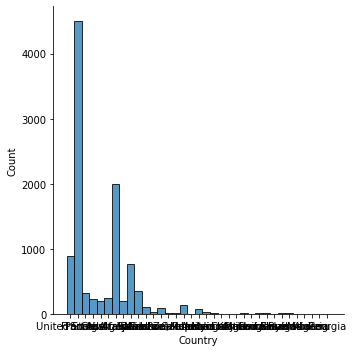

In [65]:
dfp = df.na.drop(subset=["Country"]).toPandas()
sns.displot(dfp['Country'])


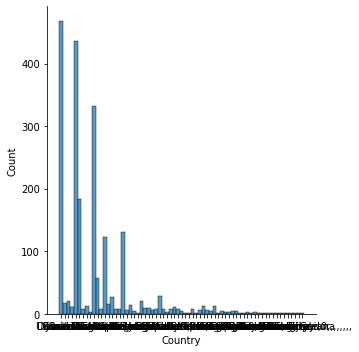

In [66]:
df_spt_p = df_spt.na.drop(subset=["Country"]).toPandas()
sns.displot(df_spt_p['Country'])

In [67]:
sqlDF = spark.sql("SELECT Country, count(*) as cnt FROM wine group by Country order by cnt desc;")

In [68]:
dfpd = sqlDF.na.drop(subset=['Country','cnt']).toPandas()

<BarContainer object of 35 artists>

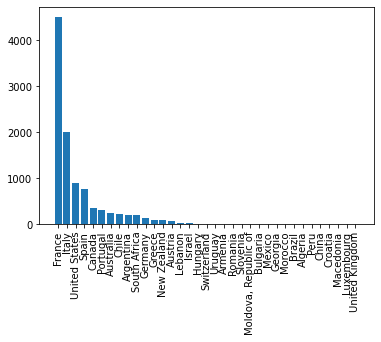

In [69]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots()
plt.xticks(rotation = 90)
ax.bar(dfpd['Country'],dfpd['cnt'])


In [70]:
sqlDF_spt = spark.sql("SELECT Country, count(*) as cnt FROM sprit group by Country order by cnt desc;")

In [71]:
df_spt_pd = sqlDF_spt.na.drop(subset=['Country','cnt']).toPandas()

<BarContainer object of 67 artists>

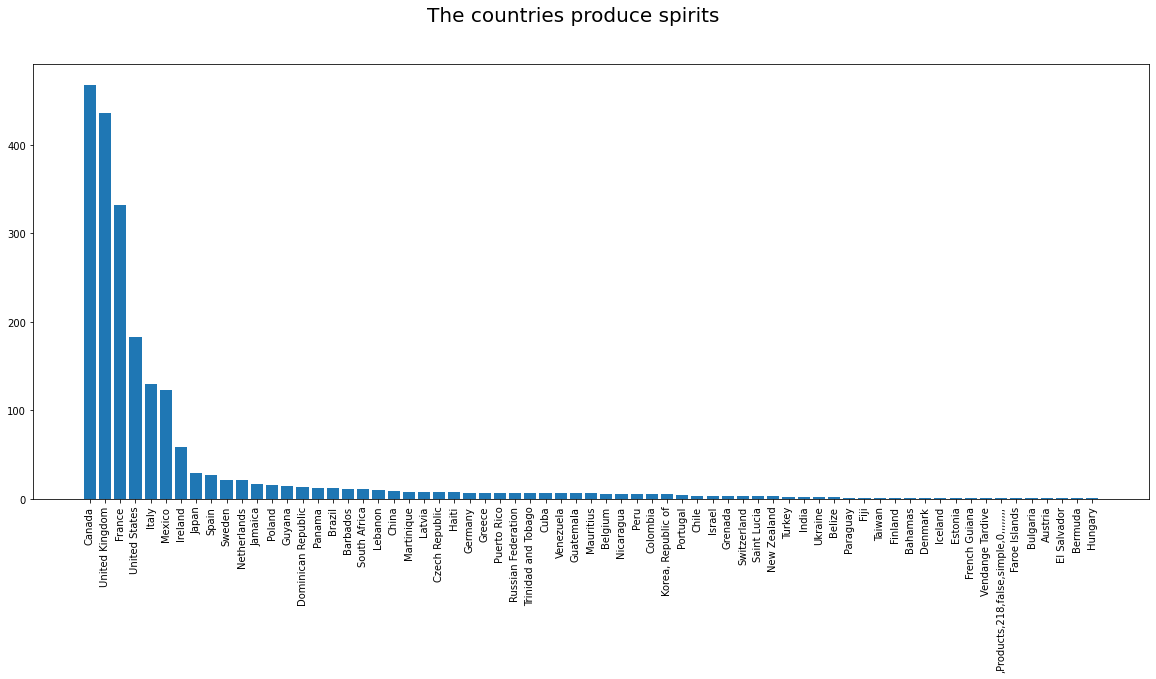

In [113]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize=(20,8))
plt.suptitle("The countries produce spirits", fontsize=20)
plt.xticks(rotation = 90)
ax.bar(df_spt_pd['Country'],df_spt_pd['cnt'])


In [73]:
sqlDF1 = spark.sql("SELECT  Producer,Color, count(productName) from wine where Color =='Red' group by 1,2 order by 3 desc limit 5;")
#sqlDF1.show(truncate=False)

sqlDF2 = spark.sql("SELECT  Producer,Color, count(productName) from wine where Color =='White' group by 1,2 order by 3 desc limit 5;")
#sqlDF2.show(truncate=False)

sqlDF3 = sqlDF1.union(sqlDF2)
sqlDF3.show(truncate=False)

+------------------------------+-----+------------------+
|Producer                      |Color|count(productName)|
+------------------------------+-----+------------------+
|Louis Jadot                   |Red  |45                |
|Domaine Taupenot-Merme        |Red  |33                |
|Mathilde Chapoutier Sélection|Red  |32                |
|Bouchard Père &amp; Fils     |Red  |26                |
|Domaine Clarence Dillon SA    |Red  |25                |
|Mathilde Chapoutier Sélection|White|21                |
|Louis Jadot                   |White|20                |
|Albert Bichot                 |White|18                |
|Weingut Hermann Dönnhoff     |White|15                |
|F. E. Trimbach SA             |White|15                |
+------------------------------+-----+------------------+



In [74]:
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install -q pyproj==1.9.6

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [114]:
dfcnt = spark.read.csv("countries.csv", header=True, inferSchema=True)

In [115]:
dfcnt.show()

+-------+----------+-----------+--------------------+
|country|  latitude|  longitude|                name|
+-------+----------+-----------+--------------------+
|     AD| 42.546245|   1.601554|             Andorra|
|     AE| 23.424076|  53.847818|United Arab Emirates|
|     AF|  33.93911|  67.709953|         Afghanistan|
|     AG| 17.060816| -61.796428| Antigua and Barbuda|
|     AI| 18.220554| -63.068615|            Anguilla|
|     AL| 41.153332|  20.168331|             Albania|
|     AM| 40.069099|  45.038189|             Armenia|
|     AN| 12.226079| -69.060087|Netherlands Antilles|
|     AO|-11.202692|  17.873887|              Angola|
|     AQ|-75.250973|  -0.071389|          Antarctica|
|     AR|-38.416097| -63.616672|           Argentina|
|     AS|-14.270972|-170.132217|      American Samoa|
|     AT| 47.516231|  14.550072|             Austria|
|     AU|-25.274398| 133.775136|           Australia|
|     AW|  12.52111| -69.968338|               Aruba|
|     AZ| 40.143105|  47.576

In [80]:
sqlDF = spark.sql("SELECT Country, count(Country) as cnt  FROM wine GROUP BY Country ORDER BY cnt desc;")
sqlDF.show()

+-------------+----+
|      Country| cnt|
+-------------+----+
|       France|4502|
|        Italy|2001|
|United States| 890|
|        Spain| 760|
|       Canada| 355|
|     Portugal| 316|
|    Australia| 239|
|        Chile| 226|
|    Argentina| 202|
| South Africa| 195|
|      Germany| 132|
|       Greece|  98|
|  New Zealand|  95|
|      Austria|  78|
|      Lebanon|  35|
|       Israel|  29|
|      Hungary|  15|
|  Switzerland|  12|
|      Uruguay|   7|
|      Armenia|   7|
+-------------+----+
only showing top 20 rows



In [81]:
sqlDF_spt = spark.sql("SELECT Country, count(Country) as cnt  FROM sprit GROUP BY Country ORDER BY cnt desc;")
sqlDF_spt.show()

+------------------+---+
|           Country|cnt|
+------------------+---+
|            Canada|468|
|    United Kingdom|436|
|            France|332|
|     United States|183|
|             Italy|130|
|            Mexico|123|
|           Ireland| 58|
|             Japan| 29|
|             Spain| 27|
|       Netherlands| 21|
|            Sweden| 21|
|           Jamaica| 17|
|            Poland| 16|
|            Guyana| 14|
|Dominican Republic| 13|
|            Brazil| 12|
|            Panama| 12|
|          Barbados| 11|
|      South Africa| 11|
|           Lebanon| 10|
+------------------+---+
only showing top 20 rows



In [82]:
dfnew = sqlDF.join(dfcnt,sqlDF.Country==dfcnt.name,how='left')
dfnew = dfnew.orderBy('cnt', ascending=False).limit(10)
dfnew.show()

+-------------+----+-------+----------+-----------+-------------+
|      Country| cnt|country|  latitude|  longitude|         name|
+-------------+----+-------+----------+-----------+-------------+
|       France|4502|     FR| 46.227638|   2.213749|       France|
|        Italy|2001|     IT|  41.87194|   12.56738|        Italy|
|United States| 890|     US|  37.09024| -95.712891|United States|
|        Spain| 760|     ES| 40.463667|   -3.74922|        Spain|
|       Canada| 355|     CA| 56.130366|-106.346771|       Canada|
|     Portugal| 316|     PT| 39.399872|  -8.224454|     Portugal|
|    Australia| 239|     AU|-25.274398| 133.775136|    Australia|
|        Chile| 226|     CL|-35.675147| -71.542969|        Chile|
|    Argentina| 202|     AR|-38.416097| -63.616672|    Argentina|
| South Africa| 195|     ZA|-30.559482|  22.937506| South Africa|
+-------------+----+-------+----------+-----------+-------------+



In [83]:
df_spt_new = sqlDF_spt.join(dfcnt,sqlDF_spt.Country==dfcnt.name,how='left')
df_spt_new = df_spt_new.orderBy('cnt', ascending=False).limit(10)
df_spt_new.show()

+--------------+---+-------+---------+-----------+--------------+
|       Country|cnt|country| latitude|  longitude|          name|
+--------------+---+-------+---------+-----------+--------------+
|        Canada|468|     CA|56.130366|-106.346771|        Canada|
|United Kingdom|436|     GB|55.378051|  -3.435973|United Kingdom|
|        France|332|     FR|46.227638|   2.213749|        France|
| United States|183|     US| 37.09024| -95.712891| United States|
|         Italy|130|     IT| 41.87194|   12.56738|         Italy|
|        Mexico|123|     MX|23.634501|-102.552784|        Mexico|
|       Ireland| 58|     IE| 53.41291|   -8.24389|       Ireland|
|         Japan| 29|     JP|36.204824| 138.252924|         Japan|
|         Spain| 27|     ES|40.463667|   -3.74922|         Spain|
|        Sweden| 21|     SE|60.128161|  18.643501|        Sweden|
+--------------+---+-------+---------+-----------+--------------+



In [84]:
dfnew_pd = dfnew.toPandas()
df_spt_new_pd = df_spt_new.toPandas()

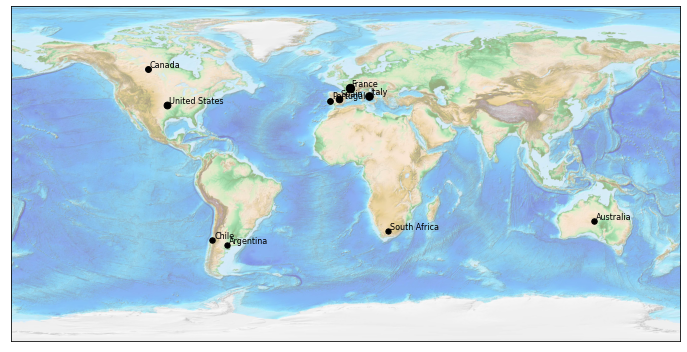

In [85]:
import numpy as np 
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
#draw_map(m)
m.etopo(scale=0.5, alpha=0.5)


for index, row in dfnew_pd.iterrows():
  # Map (long, lat) to (x, y) for plotting
  x, y = m(row['longitude'], row['latitude'])
  plt.plot(x, y, 'ok', markersize=np.log(row['cnt']))
  plt.text(x+1, y+1, row['Country'], fontsize=8)

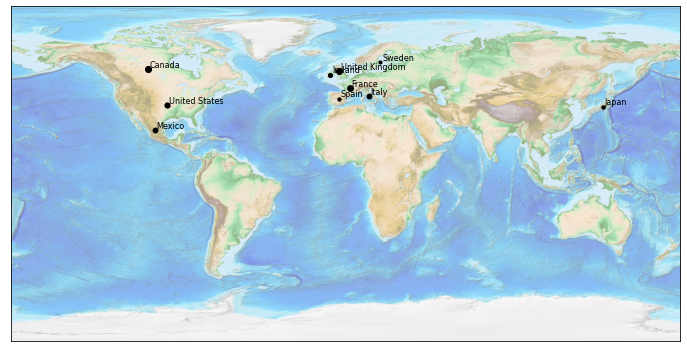

In [86]:
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )

m.etopo(scale=0.5, alpha=0.5)


for index, row in df_spt_new_pd.iterrows():
  # Map (long, lat) to (x, y) for plotting
  x, y = m(row['longitude'], row['latitude'])
  plt.plot(x, y, 'ok', markersize=np.log(row['cnt']))
  plt.text(x+1, y+1, row['Country'], fontsize=8);

In [87]:
from pyspark.sql import functions as F

In [88]:
df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).show()

+-------+------+---------------------+-------------+-----------------+-------------+-----+----+--------+---------------+--------+--------+------------------+-----------+---------------+------------+--------------+-----------+---------------+--------------+----------+---------------------+--------------+---------------+----------+--------+-------------+--------------+
|Country|Region|Regulated Designation|Grape variety|Degree of alcohol|Sugar content|Color|Size|Producer|Promoting agent|SAQ code|UPC code|Product of Québec|productName|productCategory|productPrice|productInStock|productType|productAvgScore|productReviews|image_link|Designation of origin|Classification|Special feature|productSku|SAQ_code|sugar_content|Degree_alcohol|
+-------+------+---------------------+-------------+-----------------+-------------+-----+----+--------+---------------+--------+--------+------------------+-----------+---------------+------------+--------------+-----------+---------------+--------------+----

In [89]:
df.rdd.getNumPartitions()

1

**(t-SNE) Visualization:**<br>
T-Distributed Stochastic Neighbouring Entities (t-SNE)
Let's do a t-SNE visualization clustering with 3 features price per liter, sugar level and alcohol percentage!
All NULL values of these three features are ignored.

In [90]:
df.describe().show()

+-------+-------+---------+---------------------+--------------------+-----------------+-------------+-----+------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+-----------------+-----------+------------------+-------------------+--------------------+---------------------+--------------+--------------------+--------------------+--------------------+-----------------+------------------+
|summary|Country|   Region|Regulated Designation|       Grape variety|Degree of alcohol|Sugar content|Color|  Size|            Producer|     Promoting agent|            SAQ code|            UPC code|Product of Québec|         productName|     productCategory|     productPrice|productType|   productAvgScore|     productReviews|          image_link|Designation of origin|Classification|     Special feature|          productSku|            SAQ_code|    sugar_content|    Degree_alcohol|
+-------+-------+-------

In [91]:
df_tsne = df.select(["Degree of alcohol","Size","productPrice","Sugar content","SAQ_code","productSku"])
df_tsne = df_tsne.na.drop()
df_tsne.count()

6994

In [92]:
# Let's check if all Sugar contents and Alcohol degrees are expressed in g/L and ml
df_tsne.createOrReplaceTempView("wine")
sqlDF = spark.sql("select distinct trim(RIGHT(`Degree of alcohol`,1)) from wine")
sqlDF.show()

+----------------------------------------+
|trim(right(wine.`Degree of alcohol`, 1))|
+----------------------------------------+
|                                       %|
+----------------------------------------+



In [93]:
sqlDF = spark.sql("select distinct trim(RIGHT(`Sugar content`,3)) from wine")
sqlDF.show()

+------------------------------------+
|trim(right(wine.`Sugar content`, 3))|
+------------------------------------+
|                                 g/L|
+------------------------------------+



In [94]:
sqlDF = spark.sql("select distinct trim(RIGHT(`Size`,2)) from wine")
sqlDF.show()

+---------------------------+
|trim(right(wine.`Size`, 2))|
+---------------------------+
|                          L|
|                         ml|
+---------------------------+



In [95]:
sqlDF = spark.sql("select coalesce (SAQ_code,productSku) as code, trim(replace(replace\
(replace(`Sugar content`,'g/L',''),'&lt;',''),'&gt;','')) as sugar, \
trim(replace(`Degree of alcohol`,'%','')) as alcohol, round(IF(trim(RIGHT(`Size`,2))='L',\
productPrice/replace(`Size`,'L',''),productPrice/(replace(`Size`,'ml','')/1000)),3) as price\
 from wine")
sqlDF=sqlDF.na.drop()
sqlDF.createOrReplaceTempView("winef")
sqlDF.show()

+--------+-----+-------+------+
|    code|sugar|alcohol| price|
+--------+-----+-------+------+
|14139863|  2.1|     14|19.933|
|   22871|  1.8|   13.3|34.467|
|13584455|  6.8|   15.5|38.467|
|13679892|  5.2|     13|22.067|
|13950347|  3.7|   12.5|14.383|
|14296666|  5.7|     13|24.867|
|12728904|  1.2|   12.5|15.933|
|13746485|  2.2|   12.5|  16.4|
|10667474|  2.1|   12.5|  25.4|
|10838801|  4.6|     13|16.933|
|14208427|  3.7|   13.5|  25.4|
|12824197|  2.1|     14|25.267|
|   17897|  2.1|     13|33.267|
|13624710|  8.5|     16|23.933|
|12889126|  1.2|     13|  18.8|
|13876247|  8.7|   13.5|21.267|
|10845357|  2.1|   12.5|24.267|
|14228356|  1.6|   12.5|19.067|
|12284303|  2.4|   13.5|24.067|
|  130724|  1.2|   11.8|21.533|
+--------+-----+-------+------+
only showing top 20 rows



In [96]:
spark.sql("select * from winef where price is null").show()

+----+-----+-------+-----+
|code|sugar|alcohol|price|
+----+-----+-------+-----+
+----+-----+-------+-----+



In [97]:
import numpy as np
data = np.array(sqlDF.select(['sugar','alcohol','price']).collect())
data = data.astype('float')

In [98]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data)



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6993 samples in 0.005s...
[t-SNE] Computed neighbors for 6993 samples in 0.293s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6993
[t-SNE] Computed conditional probabilities for sample 2000 / 6993
[t-SNE] Computed conditional probabilities for sample 3000 / 6993
[t-SNE] Computed conditional probabilities for sample 4000 / 6993
[t-SNE] Computed conditional probabilities for sample 5000 / 6993
[t-SNE] Computed conditional probabilities for sample 6000 / 6993
[t-SNE] Computed conditional probabilities for sample 6993 / 6993
[t-SNE] Mean sigma: 0.493328
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.627670
[t-SNE] KL divergence after 300 iterations: 1.809084


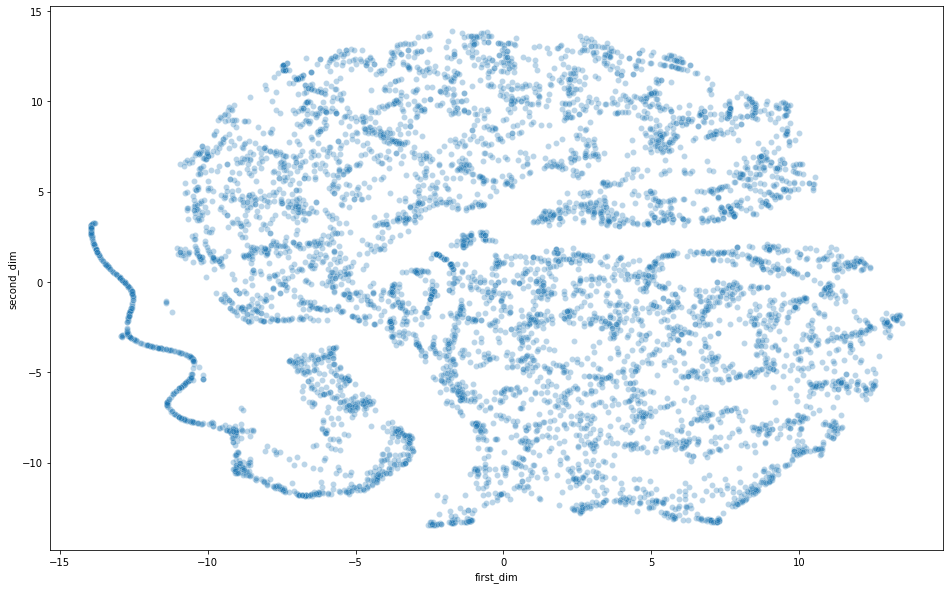

In [99]:
import seaborn as sns
import pandas as pd 
df_pd_tsne = pd.DataFrame(tsne_results,
                   columns=['first_dim', 'second_dim'])
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="first_dim", y="second_dim",
    palette=sns.color_palette("hls", 10),
    data=df_pd_tsne,
    legend="full",
    alpha=0.3
)

In [100]:
df_pd_tsne

,first_dim,second_dim
0,10.595419,-3.372786
1,-3.200175,11.791950
2,2.280756,6.857502
3,3.792672,-5.773277
4,7.483724,-10.910597
...,...,...
6988,1.208000,-7.306225
6989,10.322296,5.467795
6990,0.809007,-4.784261
6991,-9.983398,5.112012


In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X = StandardScaler().fit_transform(data)

clustering = DBSCAN(eps=1, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 3
Estimated number of noise points: 55


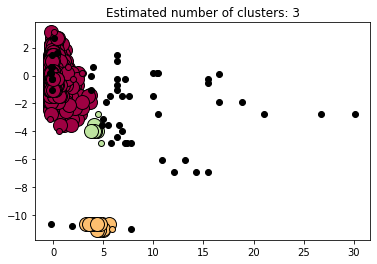

In [102]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Hierartical Clustering:

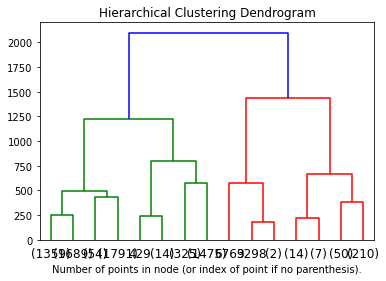

In [103]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X = data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [104]:
type(data[0,1])

numpy.float64

K-means clustering with two clusters:

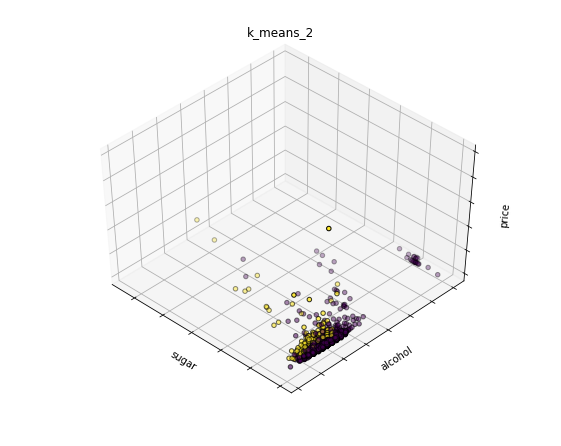

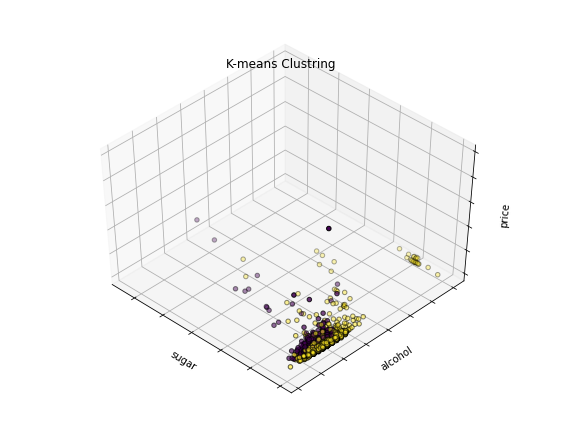

In [105]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

np.random.seed(5)

X = data

estimators = [('k_means_2', KMeans(n_clusters=2)),
              ('k_means_init', KMeans(n_clusters=2, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['k_means_2', 'k_means_init']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 0], X[:, 1], X[:, 2],
               c=labels.astype(float),
                edgecolor='k')   

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('sugar')
    ax.set_ylabel('alcohol')
    ax.set_zlabel('price')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('sugar')
ax.set_ylabel('alcohol')
ax.set_zlabel('price')
ax.set_title('K-means Clustring')
ax.dist = 12

fig.show()